https://colab.research.google.com/drive/1fTBX7-fI6pyLPk3mMNdhP5gUcMeaef3f?authuser=1#scrollTo=1uzd4DpDG--J

https://colab.research.google.com/drive/1U513UUXfRY5o2ZXs82kgFaG6lZhdUbji?authuser=1#scrollTo=0-z_WkeNzz5s

### FUNCOES DE APOIO

#### Distribuicao dos dados

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

def plot_distribuicao_faixa_etaria(df, coluna):
    plt.figure(figsize=(15, 6))
    coluna_foco = coluna

    if coluna == 'Idade':
        def classificar_idade(idade):
            if idade <= 11:
                return 'Inf√¢ncia <= 11'
            elif idade <= 17:
                return 'Adolesc√™ncia 12 - 17'
            elif idade <= 29:
                return 'Adulto jovem 18 - 29'
            elif idade <= 59:
                return 'Adulto 30 - 59'
            else:
                return 'Idoso >= 60'

        coluna_foco = 'Faixa Et√°ria'
        df[coluna_foco] = df[coluna].apply(classificar_idade)
        ordem_faixas = ['Inf√¢ncia <= 11', 'Adolesc√™ncia 12 - 17',
                        'Adulto jovem 18 - 29', 'Adulto 30 - 59', 'Idoso >= 60']
        contagem = df[coluna_foco].value_counts().reindex(ordem_faixas)
        porcentagem = df[coluna_foco].value_counts(normalize=True).reindex(ordem_faixas) * 100
    else:
        contagem = df[coluna_foco].value_counts()
        porcentagem = df[coluna_foco].value_counts(normalize=True) * 100

    # Preparar DataFrame para plotagem
    df_plot = porcentagem.reset_index()
    df_plot.columns = [coluna_foco, 'Porcentagem']
    contagem = contagem.values

    # Gr√°fico de barras
    sns.barplot(x=coluna_foco, y='Porcentagem', data=df_plot, color='skyblue')

    # Linha com marcadores
    sns.lineplot(x=np.arange(len(df_plot)), y='Porcentagem', data=df_plot, color='blue', marker='o')

    # Anota√ß√µes nos pontos
    for i, (abs_val, pct) in enumerate(zip(contagem, df_plot['Porcentagem'])):
        plt.text(i, pct + 0.5, f'{abs_val}\n{pct:.1f}%', ha='center', va='bottom', fontsize=10)

    # Ajustes visuais
    plt.title(f'Distribui√ß√£o percentual por {coluna_foco}', fontsize=14)
    plt.ylabel('Porcentagem (%)')
    plt.xlabel(coluna_foco)
    plt.ylim(0, max(df_plot['Porcentagem']) + 10)

    # Rotacionar r√≥tulos se muitos
    if len(df_plot[coluna_foco]) > 5:
        plt.xticks(rotation=45, ha='right')

    plt.tight_layout()

    # Criar a pasta 'images' se n√£o existir
    os.makedirs("images", exist_ok=True)

    # Salvar a imagem com nome baseado na coluna analisada
    nome_arquivo = f"images/distribuicao_{coluna_foco.replace(' ', '_').lower()}.png"
    plt.savefig(nome_arquivo, dpi=300)


    plt.show()


In [3]:
# pip install folium

#### Distribui√ß√£o geografica

#### FOLIUM

In [4]:
import folium
import requests
import pandas as pd
import os


def mostrar_distribuicao_por_estados(dados_tesouro: pd.DataFrame):

    # 1. Contar e mapear
    contagem = dados_tesouro['UF do Investidor'].value_counts()
    sigla_para_nome = {
        'AC': 'Acre', 'AL': 'Alagoas', 'AP': 'Amap√°', 'AM': 'Amazonas', 'BA': 'Bahia',
        'CE': 'Cear√°', 'DF': 'Distrito Federal', 'ES': 'Esp√≠rito Santo', 'GO': 'Goi√°s',
        'MA': 'Maranh√£o', 'MT': 'Mato Grosso', 'MS': 'Mato Grosso do Sul', 'MG': 'Minas Gerais',
        'PA': 'Par√°', 'PB': 'Para√≠ba', 'PR': 'Paran√°', 'PE': 'Pernambuco', 'PI': 'Piau√≠',
        'RJ': 'Rio de Janeiro', 'RN': 'Rio Grande do Norte', 'RS': 'Rio Grande do Sul',
        'RO': 'Rond√¥nia', 'RR': 'Roraima', 'SC': 'Santa Catarina', 'SP': 'S√£o Paulo',
        'SE': 'Sergipe', 'TO': 'Tocantins'
    }
    df_mapa = contagem.rename(index=sigla_para_nome).reset_index()
    df_mapa.columns = ['Estado', 'Investidores']

    # 2. Coordenadas centrais aproximadas dos estados
    coordenadas_estados = {
        'Acre': [-9.0238, -70.8120], 'Alagoas': [-9.5713, -36.7820], 'Amap√°': [1.3730, -52.5547],
        'Amazonas': [-3.4168, -65.8561], 'Bahia': [-12.5797, -41.7007], 'Cear√°': [-5.4984, -39.3206],
        'Distrito Federal': [-15.7998, -47.8645], 'Esp√≠rito Santo': [-19.1834, -40.3089],
        'Goi√°s': [-15.8270, -49.8362], 'Maranh√£o': [-5.4200, -45.2190], 'Mato Grosso': [-12.6819, -56.9211],
        'Mato Grosso do Sul': [-20.7722, -54.7852], 'Minas Gerais': [-18.5122, -44.5550],
        'Par√°': [-3.4168, -52.3330], 'Para√≠ba': [-7.2399, -36.7819], 'Paran√°': [-24.8949, -51.9620],
        'Pernambuco': [-8.8137, -36.9541], 'Piau√≠': [-7.7183, -42.7289], 'Rio de Janeiro': [-22.9068, -43.1729],
        'Rio Grande do Norte': [-5.4026, -36.9541], 'Rio Grande do Sul': [-30.0346, -51.2177],
        'Rond√¥nia': [-10.9432, -62.8278], 'Roraima': [2.7376, -62.0751], 'Santa Catarina': [-27.5954, -48.5480],
        'S√£o Paulo': [-23.5505, -46.6333], 'Sergipe': [-10.5741, -37.3857], 'Tocantins': [-10.1753, -48.2982]
    }

    # 3. Baixar GeoJSON
    url_geojson = 'https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson'
    geojson_data = requests.get(url_geojson).json()

    # 3. Adicionar n√∫mero de investidores diretamente ao GeoJSON
    for feature in geojson_data['features']:
        estado = feature['properties']['name']
        investidores = df_mapa[df_mapa['Estado'] == estado]['Investidores'].values
        if len(investidores) > 0:
            feature['properties']['investidores'] = str(investidores[0])
        else:
            feature['properties']['investidores'] = "0"

    # 4. Criar mapa
    mapa = folium.Map(location=[-14.2350, -51.9253], 
                      zoom_start=4,
                    #   width='600px',
                    #   height='400px',
                      control_scale=True
                      )

    # 5. Adicionar camada choropleth
    folium.Choropleth(
        geo_data=geojson_data,
        name='choropleth',
        data=df_mapa,
        columns=['Estado', 'Investidores'],
        key_on='feature.properties.name',
        fill_color='Blues',
        fill_opacity=0.8,
        line_opacity=0.3,
        legend_name='Quantidade de Investidores por Estado',
        highlight=True
    ).add_to(mapa)

    # 6. Adicionar tooltip com o n√∫mero de investidores
    folium.GeoJson(
        geojson_data,
        name="labels",
        tooltip=folium.GeoJsonTooltip(
            fields=["name", "investidores"],
            aliases=["Estado:", "Investidores:"],
            labels=True,
            sticky=True
        ),
        style_function=lambda x: {
            'color': 'transparent',
            'fillOpacity': 0
        }
    ).add_to(mapa)

    # 6. Adicionar marcadores de texto fixos com os valores
    for _, row in df_mapa.iterrows():
        estado = row['Estado']
        investidores = row['Investidores']
        if estado in coordenadas_estados:
            lat, lon = coordenadas_estados[estado]
            folium.map.Marker(
                [lat, lon],
                icon=folium.DivIcon(html=f"""
                    <div style="font-size: 10pt; color: black; text-align: center;">
                        <b>{investidores}</b>
                    </div>""")
            ).add_to(mapa)


    # 7. Salvar o mapa na pasta 'images'

    os.makedirs("images", exist_ok=True)  # cria pasta se n√£o existir
    caminho_arquivo = os.path.join("images", "mapa_investidores.html")
    mapa.save(caminho_arquivo)

    print(f"Mapa salvo em: {caminho_arquivo}")


    # 7. Exibir mapa
    return mapa


In [5]:
import os
import time
import folium
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager  # opcional para instalar o driver automaticamente

def salvar_mapa_como_imagem(mapa: folium.Map, caminho_html='images/mapa_investidores.html', caminho_png='images/mapa_investidores.png'):
    # Salva o mapa como HTML
    os.makedirs(os.path.dirname(caminho_html), exist_ok=True)
    mapa.save(caminho_html)

    # Configura√ß√µes do navegador headless
    options = Options()
    options.headless = True
    options.add_argument('--window-size=1200,800')
    options.add_argument('--no-sandbox')
    options.add_argument('--disable-dev-shm-usage')

    # Inicia o navegador com chromedriver
    service = Service(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service, options=options)

    try:
        # Abrir o arquivo HTML local
        full_path = 'file://' + os.path.abspath(caminho_html)
        driver.get(full_path)

        # Aguarda carregar
        time.sleep(3)

        # Tira o screenshot
        driver.save_screenshot(caminho_png)
        print(f"üì∏ Imagem salva em: {caminho_png}")
    finally:
        driver.quit()


#### GEOPANDAS

In [6]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import requests
import os

def mostrar_distribuicao_por_estados_png(dados_tesouro: pd.DataFrame, titulo: str = "Distribui√ß√£o de Investidores por Estado", nome_png: str="mapa_investidor_total"):
    # Contar investidores por estado
    contagem = dados_tesouro['UF do Investidor'].value_counts()
    sigla_para_nome = {
        'AC': 'Acre', 'AL': 'Alagoas', 'AP': 'Amap√°', 'AM': 'Amazonas', 'BA': 'Bahia',
        'CE': 'Cear√°', 'DF': 'Distrito Federal', 'ES': 'Esp√≠rito Santo', 'GO': 'Goi√°s',
        'MA': 'Maranh√£o', 'MT': 'Mato Grosso', 'MS': 'Mato Grosso do Sul', 'MG': 'Minas Gerais',
        'PA': 'Par√°', 'PB': 'Para√≠ba', 'PR': 'Paran√°', 'PE': 'Pernambuco', 'PI': 'Piau√≠',
        'RJ': 'Rio de Janeiro', 'RN': 'Rio Grande do Norte', 'RS': 'Rio Grande do Sul',
        'RO': 'Rond√¥nia', 'RR': 'Roraima', 'SC': 'Santa Catarina', 'SP': 'S√£o Paulo',
        'SE': 'Sergipe', 'TO': 'Tocantins'
    }
    df_mapa = contagem.rename(index=sigla_para_nome).reset_index()
    df_mapa.columns = ['Estado', 'Investidores']

    # Baixar GeoJSON e carregar com GeoPandas
    url_geojson = 'https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson'
    geojson_path = 'brazil_states.geojson'

    if not os.path.exists(geojson_path):
        with open(geojson_path, 'w', encoding='utf-8') as f:
            f.write(requests.get(url_geojson).text)

    gdf = gpd.read_file(geojson_path)

    # Merge com contagem
    gdf = gdf.merge(df_mapa, how='left', left_on='name', right_on='Estado')
    gdf['Investidores'] = gdf['Investidores'].fillna(0)

    # Calcular centr√≥ides para colocar os valores
    gdf['centroid'] = gdf.geometry.centroid

    # Plotar mapa
    fig, ax = plt.subplots(figsize=(12, 8.2))
    gdf.plot(column='Investidores', ax=ax, cmap='Blues', legend=True,
             legend_kwds={'label': "Quantidade de Investidores"}, edgecolor='gray')

    # Adicionar valores sobre os estados
    for _, row in gdf.iterrows():
        x, y = row['centroid'].x, row['centroid'].y
        ax.text(x, y, f"{int(row['Investidores'])}", fontsize=8, ha='center', va='center', color='black')

    ax.set_title(titulo, fontsize=14)
    ax.axis('off')

    # Salvar PNG
    os.makedirs("images", exist_ok=True)
    caminho_png = os.path.join("images", f"{nome_png}.png")
    plt.savefig(caminho_png, bbox_inches='tight', dpi=300)
    plt.close()

    print(f"Mapa PNG salvo em: {caminho_png}")


# Este colab tem como objetivo estudar o comportamento da base do tesouro direto

In [7]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# import itables
# from itables import init_notebook_mode
# init_notebook_mode(all_interactive=True)

## 1. Extracao dos Dados

In [8]:
# dados_tesouro_principal = pd.read_parquet("./data/sample_investidor_tesouro_direto.parquet")
dados_tesouro_principal = pd.read_parquet("./data/sample_investidor_tesouro_direto.parquet")
dados_tesouro = dados_tesouro_principal.copy().sample(n=100000, random_state=42)
del dados_tesouro_principal
import gc
gc.collect()

20

In [9]:
# from time import sleep
# for i in range(len(dados_tesouro)):
#     print(dados_tesouro.iloc[i])
#     sleep(5)

dados_tesouro.sort_values(by='Data de Adesao',ascending=False)

Codigo do Investidor Data de Adesao   Estado Civil Genero  \
242635               14237013     31/10/2024    Solteiro(a)      M   
521821                 895581     31/10/2024    Solteiro(a)      F   
1043721              53114175     31/10/2024  Desquitado(a)      M   
529571                3090421     31/10/2024  Desquitado(a)      M   
444222               14142078     31/10/2024    Solteiro(a)      M   
...                       ...            ...            ...    ...   
450094               14167684     01/01/1900  N√£o se aplica      N   
763985                1334133     01/01/1900    Solteiro(a)      M   
1007452              13617841     01/01/1900    Solteiro(a)      M   
447083               14111141     01/01/1900  N√£o se aplica      N   
435719               10715717     01/01/1900    Solteiro(a)      M   

                                Profissao  Idade UF do Investidor  \
242635                         EMPRES√ÅRIO     46               SP   
521821           SERVIDO P√öBLICO ESTADUAL     42               SP   
1043721                            M√âDICO     57               MG   
529571                             OUTROS     87               RN   
444222                         ENGENHEIRO     41               MG   
...                                   ...    ...              ...   
450094                      N√£o se aplica     32               MG   
763985   TRABALHADOR DE USINAGEM E METAIS     41               SP   
1007452                     ADMINISTRADOR     38               MG   
447083                      N√£o se aplica     30               MG   
435719                             OUTROS     32               BA   

           Cidade do Investidor Pais do Investidor Situacao da Conta  \
242635                SAO PAULO             BRASIL                 A   
521821                  BARUERI             BRASIL                 A   
1043721            JUIZ DE FORA             BRASIL                 A   
529571                    NATAL             BRASIL                 D   
444222                  UBERABA             BRASIL                 A   
...                         ...                ...               ...   
450094                  UBERABA             BRASIL                 A   
763985                SAO ROQUE             BRASIL                 A   
1007452            POUSO ALEGRE             BRASIL                 D   
447083              SANTA LUZIA             BRASIL                 D   
435719   LUIS EDUARDO MAGALHAES             BRASIL                 A   

        Operou 12 Meses  
242635                N  
521821                S  
1043721               N  
529571                N  
444222                N  
...                 ...  
450094                N  
763985                N  
1007452               N  
447083                N  
435719                N  

[100000 rows x 11 columns]

## 2. Analise Explorat√≥ria dos Dados

In [10]:
# Situa√ß√µes de conta existentes no dataset
dados_tesouro['Situacao da Conta'].unique()

array(['A', 'D'], dtype=object)

In [11]:
# Distribui√ß√£o de idades
min_val_idade = dados_tesouro.Idade.min()
max_val_idade = dados_tesouro.Idade.max()
ind_max_val_idade = dados_tesouro.Idade.idxmax()
print("Valor minimo de idade: ", min_val_idade)
print("Valor maximo de idade: ", max_val_idade)
print("Index do valor maximo de idade: ", ind_max_val_idade)

Valor minimo de idade:  1
Valor maximo de idade:  117
Index do valor maximo de idade:  782167


### 2.1 Tipos de dados e uso de memoria

In [12]:
print(dados_tesouro.info())

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 781974 to 435719
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Codigo do Investidor  100000 non-null  int64 
 1   Data de Adesao        100000 non-null  object
 2   Estado Civil          100000 non-null  object
 3   Genero                100000 non-null  object
 4   Profissao             100000 non-null  object
 5   Idade                 100000 non-null  int64 
 6   UF do Investidor      100000 non-null  object
 7   Cidade do Investidor  100000 non-null  object
 8   Pais do Investidor    100000 non-null  object
 9   Situacao da Conta     100000 non-null  object
 10  Operou 12 Meses       100000 non-null  object
dtypes: int64(2), object(9)
memory usage: 9.2+ MB
None


### 2.2 Quais s√£o as idades e como esta distribuido o dataset com rela√ß√£o ao investimento em tesouro direto?

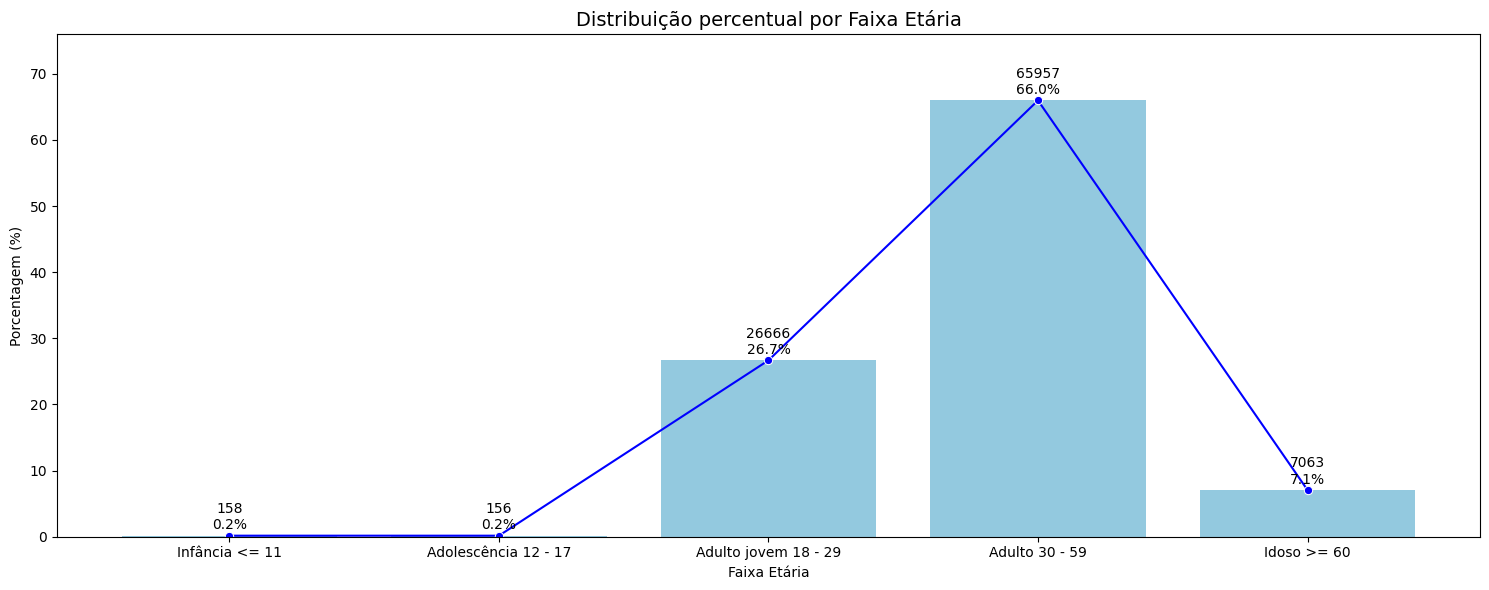

In [13]:
plot_distribuicao_faixa_etaria(dados_tesouro, 'Idade')

/tmp/ipykernel_3472798/963561094.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[coluna_foco] = df[coluna].apply(classificar_idade)


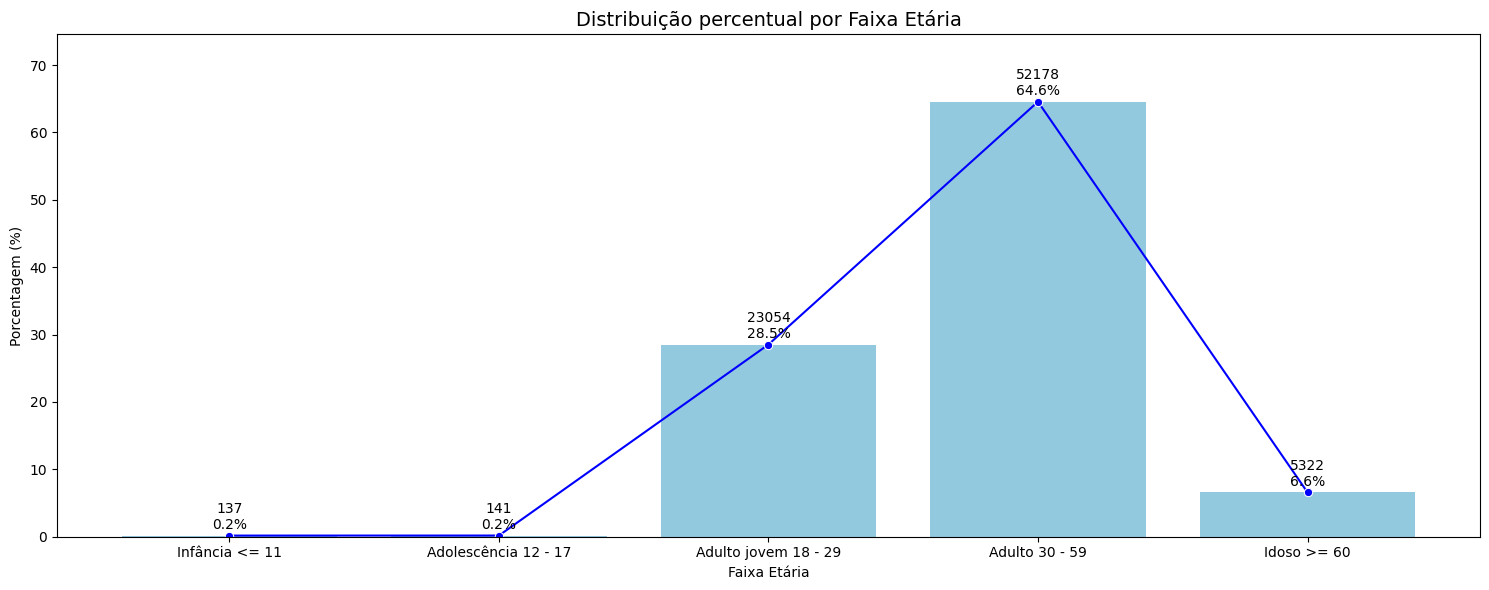

In [14]:
plot_distribuicao_faixa_etaria(dados_tesouro[dados_tesouro['Situacao da Conta']=='A'], 'Idade')

/tmp/ipykernel_3472798/963561094.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[coluna_foco] = df[coluna].apply(classificar_idade)


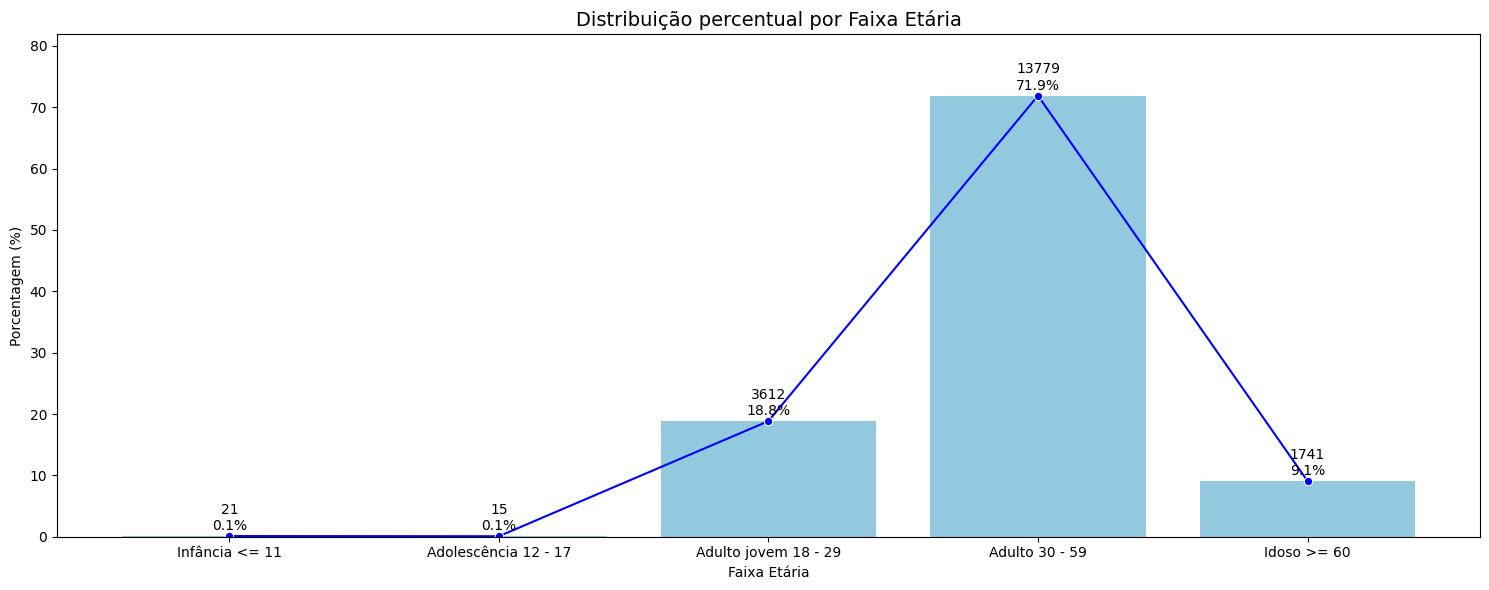

In [15]:
plot_distribuicao_faixa_etaria(dados_tesouro[dados_tesouro['Situacao da Conta']=='D'], 'Idade')

### 2.3 Qual o estado com o maior numeros de pessoas que investem em tesouro direto?

In [16]:
print(dados_tesouro[dados_tesouro['Situacao da Conta']=='D']['UF do Investidor'].value_counts().to_dict())

{'SP': 7076, 'RJ': 1904, 'MG': 1788, 'PR': 1177, 'RS': 940, 'SC': 854, 'BA': 696, 'GO': 591, 'DF': 581, 'PE': 520, 'CE': 468, 'ES': 377, 'MT': 274, 'PA': 273, 'MA': 221, 'MS': 205, 'PB': 201, 'AM': 192, 'RN': 183, 'SE': 129, 'AL': 121, 'PI': 121, 'RO': 92, 'TO': 68, 'AP': 44, 'RR': 40, 'AC': 32}


In [17]:
mostrar_distribuicao_por_estados_png(dados_tesouro, titulo="Distribui√ß√£o de investidores por estado", nome_png="mapa_investidor_total")

/tmp/ipykernel_3472798/3828821479.py:37: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf.geometry.centroid


Mapa PNG salvo em: images/mapa_investidor_total.png


#### 2.3.1 A relacao entre o idh e numero de investidores √© diretamente proporcional?

In [18]:
df_idh = pd.read_csv('./another_datas/idh_table.csv', sep='\t')
df_idh = df_idh[['UF', 'Estado', 'IDH-M 2021']]

In [19]:
df_count_investidor_idh = dados_tesouro.groupby('UF do Investidor').size().reset_index(name='Quantidade de Investidores')
# Garantir que as colunas estejam no mesmo formato
df_idh['UF'] = df_idh['UF'].str.strip().str.upper()
df_count_investidor_idh['UF do Investidor'] = df_count_investidor_idh['UF do Investidor'].str.strip().str.upper()
df_agrupado_com_idh = df_count_investidor_idh.merge(df_idh, left_on='UF do Investidor', right_on='UF', how='left')

df_agrupado_com_idh = df_agrupado_com_idh.sort_values(by="IDH-M 2021", ascending=False)
df_agrupado_com_idh_foco = df_agrupado_com_idh[['UF', 'Quantidade de Investidores', 'IDH-M 2021']]

In [20]:
correlacao = df_agrupado_com_idh_foco[['Quantidade de Investidores', 'IDH-M 2021']].corr(method='spearman')
print(correlacao)

                            Quantidade de Investidores  IDH-M 2021
Quantidade de Investidores                    1.000000    0.681325
IDH-M 2021                                    0.681325    1.000000


In [21]:
from scipy.stats import pearsonr

# Supondo que voc√™ tenha essas duas colunas no seu DataFrame:
x = df_agrupado_com_idh_foco['Quantidade de Investidores']
y = df_agrupado_com_idh_foco['IDH-M 2021']

# Calcula a correla√ß√£o e o p-valor
correlacao, p_valor = pearsonr(x, y)

print(f"Correla√ß√£o de Pearson: {correlacao:.3f}")
print(f"P-valor: {p_valor:.5f}")


Correla√ß√£o de Pearson: 0.570
P-valor: 0.00192


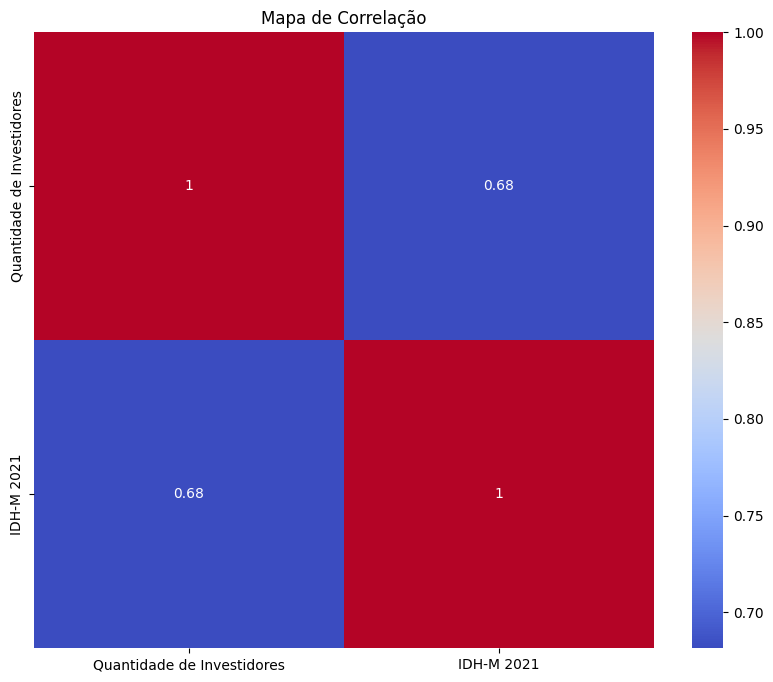

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

correlacoes = df_agrupado_com_idh_foco[['Quantidade de Investidores', 'IDH-M 2021']].corr(method='spearman')
plt.figure(figsize=(10,8))
sns.heatmap(correlacoes, annot=True, cmap='coolwarm')
plt.title('Mapa de Correla√ß√£o')
plt.show()


### 2.4 Qual a distribui√ß√£o de genero no dataset?

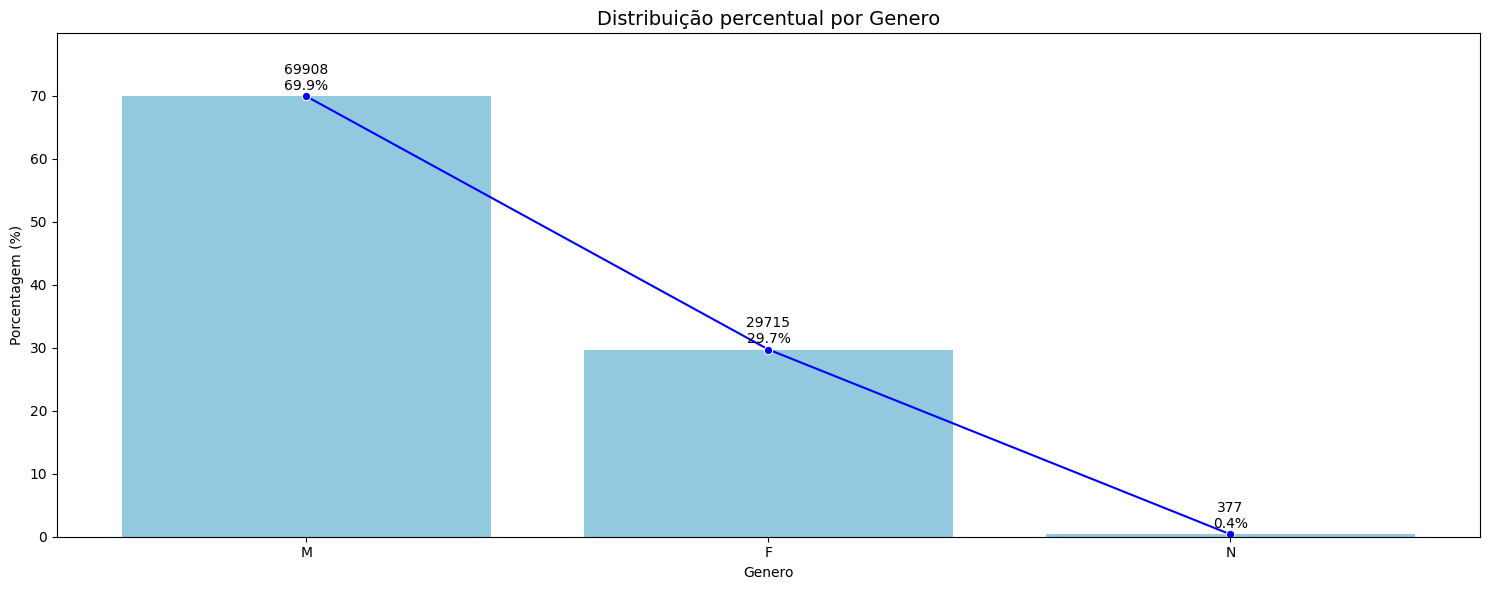

In [23]:
plot_distribuicao_faixa_etaria(dados_tesouro, 'Genero')

### 2.4 Qual a profiss√£o se destaca no dataset?

#### 2.4.1 Criando agrupamentos de profissoes

In [24]:
profissoes_agrupadas = {
    "N√£o CLTs": ["PROFISSIONAL LIBERAL", 'TRABALHADOR AUT√îNOMO'],
    "Outros": [
        "OUTROS", "N√£o se aplica", "FALECIDO"
    ],
    "Aposentados e Pensionistas": [
        "APOSENTADO (EXCETO FUNCION√ÅRIO P√öBLICO)",
        "FUNCION√ÅRIO P√öBLICO CIVIL APOSENTADO",
        "MILITAR REFORMADO", "PENSIONISTA"
    ],
    "Estudantes e Bolsistas": [
        "BOLSISTA, ESTAGI√ÅRIO E ASSEMELHADOS", "ESTUDANTE"
    ],
    "Funcion√°rios P√∫blicos": [
        "SERVIDOR P√öBLICO FEDERAL", "SERVIDOR P√öBLICO MUNICIPAL", "SERVIDO P√öBLICO ESTADUAL",
        "FUNCION√ÅRIO P√öBLICO CIVIL APOSENTADO",
        "OCUPANTE DE CARGO DE DIRE√áAO E ASSESSORAMENTO SUPERIOR",
        "OCUPANTE DE CARGO DE DIRE√áAO E ASSESSORAMENTO INTERMEDI√ÅRIO",
        "MEMBRO DO PODER JUDICI√ÅRIO: MINISTRO DE TRIB. SUPERIOR",
        "MEMBRO DO PODER LEGISLATIVO: SENADOR, DEP.FED.E ESTADUAL",
        "MEMBRO DO PODER EXECUTIVO: PRES.REP√öBLICA, MINISTRO ETC.",
        "DELEGADO DE POL√çCIA", "FISCAL"
    ],
    "Profissionais da Sa√∫de": [
        "M√âDICO", "ODONT√ìLOGO E DENTISTA", "ENFERMEIRO E NUTRICIONISTA",
        "FISIOTERAPEUTA E TERAPEUTA OCUPACIONAL", "FARMAC√äUTICO", "FONOAUDI√ìLOGO",
        "PSIC√ìLOGO", "BI√ìLOGO E BIOM√âDICO", "T√âCNICO DE LABORAT√ìRIO E RAIO X", 'PROT√âTICO', 'VETERIN√ÅRIO E ZOOTECNISTA'
    ],
    "Engenharia e Tecnologia": [
        "ENGENHEIRO", "T√âCNICO DE MEC√ÇNICA", "T√âCNICO DE ELETRICIDADE, ELETR√îNICA E TELECOMUNICA√á√ïES",
        "T√âCNICO DE QU√çMICA", "T√âCNICO DE CONTABILIDADE E DE ESTAT√çSTICA",
        "T√âCNICO EM AGRONOMIA E AGRIMENSURA", "TECNOLOGO", "ANALISTA DE SISTEMAS", 'ARQUITETO',
        'TECN√ìLOGO'
    ],
    "Direito e Justi√ßa": [
        "ADVOGADO", "PROCURADOR E ASSEMELHADOS", "SERVENTU√ÅRIO DE JUSTI√áA", "TABELI√ÉO"
    ],
    "Educa√ß√£o e Pesquisa": [
        "PROFESSOR DE ENSINO SUPERIOR", "PROFESSOR DE PRIMEIRO E SEGUNDO GRAUS",
        "DIRETOR DE ESTABELECIMENTO DE ENSINO",
        'BIBLIOTEC√ÅRIO, ARQUIVISTA, MUSE√ìLOGO E ARQUE√ìLOGO', 'SOCI√ìLOGO',
        'OUTROS TRABALHADORES DE N√çVEL SUPERIOR LIGADOS AO ENSINO'
    ],
    "Ci√™ncias Exatas e Humanas": [
        "ECONOMISTA", "SOCIOLOGO", "ESTAT√çSTICO", "F√çSICO", "GE√ìGRAFO", "GE√ìLOGO",
        "ATU√ÅRIO E MATEM√ÅTICO"
    ],
    "Com√©rcio e Vendas": [
        "VENDEDOR PRACISTA, REPRESENTANTE COMERCIAL, CAIXEIRO VIAJANTE",
        "VENDEDOR DE COM√âRCIO VAREJISTA E ATACADISTA", "SECURIT√ÅRIO",
        "CORRETOR DE IM√ìVEIS, SEGUROS, T√çTULOS E VALORES",
        "FEIRANTE", "JORNALEIRO", "SUPERIOR, INSPETOR E AGENTE DE COMPRAS E VENDAS",'DEMONSTRADOR'
    ],
    "Artes, Comunica√ß√£o e Entretenimento": [
        "JORNALISTA", "PUBLICIT√ÅRIO", "COMUNIC√ìLOGO", "RELA√á√ïES P√öBLICAS",
        "ATOR E DIRETOR DE ESPET√ÅCULOS P√öBLICOS", "CANTOR E COMPOSITOR", "M√öSICO",
        "LOCUTOR E COMENTARISTA DE R√ÅDIO E TELEVIS√ÉO E RADIALISTA",
        "DESENHISTA COMERCIAL", "DESENHISTA T√âCNICO", "DESENHISTA INDUSTRIAL",
        "DECORADOR", "MODELO DE MODAS", "CORE√ìGRAFO E BAILARINO",
        "PROFISSIONAIS DE LETRAS E DE ARTES", "ESCULTOR, PINTOR E ASSEMELHADOS",
        "DIPLOMATA", "AGENCIADOR DE PROPAGANDA", "OPERADOR DE C√ÇMARA DE CINEMA E TELEVIS√ÉO"
    ],
    "Administra√ß√£o e Neg√≥cios": [
        "ADMINISTRADOR", "GERENTE", "DIRETOR DE EMPRESAS", "COORDENADOR E SUPERVISOR",
        "CONSULTOR", "EMPRES√ÅRIO", "EMPRES√ÅRIO ART√çSTICO E PRODUTOR DE ESPET√ÅCULOS P√öBLICOS"
    ],
    "Contabilidade e Finan√ßas": [
        "BANCARIO E ECONOMI√ÅRIO", "CONTADOR", "TRABALHADOR DOS SERVI√áOS DE CONTABILIDADE, DE CAIXA"
    ],
    "Transportes e Log√≠stica": [
        "PILOTO DE AERONAVES", "MOTORISTA DE VE√çCULOS DE TRANSPORTE DE PASSAGEIROS",
        "MOTORISTA DE VEICULOS DE TRANSPORTE DE CARGA", "COMISS√ÅRIO DE BORDO",
        "MAQUINISTA E FOGUISTA DE EMBARCA√á√ïES, LOCOMOTIVAS", "COMANDANTE DE EMBARCA√áOES",
        "CONTRAMESTRE DE EMBARCA√á√ïES", 'MARINHEIRO E ASSEMELHADOS'
    ],
    "Trabalho Operacional e T√©cnicos": [
        "MEC√ÇNICO DE MANUTEN√á√ÉO DE VE√çCULOS AUTOM√ìVEIS E M√ÅQUINAS",
        "ELETRICISTA E ASSEMELHADOS", "LANTERNEIRO E PINTOR DE VE√çCULOS MET√ÅLICOS",
        "ELETRICISTA DE MANUTEN√á√ÉO DE VE√çCULOS AUTOMOTORES M√ÅQUINAS",
        "MECANICO DE MANUTEN√á√ÉO, MONTADOR, PREPARADOR, OPERADOR"
    ],
    "Servi√ßos Gerais": [
        "AUXILIAR DE ESCRIT√ìRIO E ASSEMELHADOS", "AGENTE ADMINISTRATIVO",
        "PORTEIRO DE EDIF√çCIO, ASCENSORISTA, GARAGISTA E FAXINEIRO",
        "SECRETARIO, ESTEN√ìGRAFO, DATIL√ìGRAFO, RECEPCIONISTA,TELEF.",
        "EMPREGADO DOM√âSTICO", "AUXILIAR DE LABORATORIO", "GOVERNANTA DE HOTEL, CAMAREIRO, PORTEIRO, COZINHEIRO"
    ],
    "Religi√£o e Assist√™ncia Social": [
        "SACERDOTE OU MEMBRO DE ORDENS OU SEITAS RELIGIOSAS", "ASSISTENTE SOCIAL"
    ],
    "For√ßas de Seguran√ßa e Defesa": [
        "MILITAR EM GERAL", "OFICIAIS DAS FOR√áAS ARMADAS E FOR√áAS AUXILIARES", "BOMBEIRO"
    ],
    "Propriet√°rios e Renda Passiva": [
        "PROPRIET√ÅRIO DE ESTABELECIMENTO INDUSTRIAL",
        "PROPRIET√ÅRIO DE ESTABELECIMENTO COMERCIAL",
        "PROPRIET√ÅRIO DE ESTABELECIMENTO DE PRESTA√á√ÉO DE SERVI√áOS",
        "PROPRIETARIO DE MICROEMPRESAS",
        "PROPRIET√ÅRIO DE IM√ìVEL (RECEBENDO RENDIMENTO DE ALUGUEL)",
        "PROPRIET√ÅRIO DE ESTABELECIMENTO AGR√çCOLA, DA PECU√ÅRIA",
        "CAPITALISTA, RECEBENDO RENDIMENTO DE APLICA√á√ÉO DE CAPITAL"
    ],
    "Trabalhadores Rurais e Agropecu√°rios": [
        "TRABALHADOR AGR√çCOLA", "TRABALHADOR DA PECU√ÅRIA", "AGRONOMO",
        "T√âCNICO EM AGRONOMIA E AGRIMENSURA", "GARIMPEIRO", "TRABALHADOR FLORESTAL", 'TRABALHADOR DA PESCA'
    ],
    "Trabalho Industrial e Produ√ß√£o": [
        "TRABALHADOR DE CONSTRU√á√ÉO CIVIL", "TRABALHADOR METAL√öRGICO E SIDER√öRGICO",
        "TRABALHADOR DE FABRICA√á√ÉO DE ROUPAS", "TRABALHADOR DE FABRICA√á√ÉO DE PRODUTOS DE BORRACHA E PL√ÅSTICO",
        "TRABALHADOR DE FABRICA√á√ÉO E PREPARA√á√ÉO DE ALIMENTOS BEBIDAS",
        "TRABALHADOR DE FABRICA√á√ÉO DE PRODUTOS T√äXTEIS", "TRABALHADOR DE USINAGEM E METAIS",
        "TRABALHADOR DE FABRICA√á√ÉO DE CAL√áADOS E ARTEFATOS DE COURO",
        "TRABALHADOR DE FABRICA√á√ÉO DE PAPEL E PAPEL√ÉO", "TRABALHADOR DE ARTES GR√ÅFICAS",
        "TRABALHADOR DE INSTALA√á√ïES DE PROCESSAMENTO QU√çMICO",
        "TRABALHADOR DE TRATAMENTO DE FUMO E DE FABR. CIGARROS",
        "TRABALHADOR DE FABRICA√á√ÉO DE ARTEFATOS DE MADEIRA"
    ],
    "Servi√ßos Espec√≠ficos": [
        "CABELEIREIRO, BARBEIRO, MANICURE, PEDICURE, MAQUILADOR",
        "LEILOEIRO, AVALIADOR E ASSEMELHADOS", "DESPACHANTE, INCLUSIVE O ADUANEIRO",
        "AGENTE DE SERVI√áOS FUNER√ÅRIOS E EMBALSAMADOR", "AGENTE DE VIAGEM E GUIA DE TURISMO"
    ],
    "Ci√™ncias Naturais e Exatas": [
        "ASTR√îNOMO E METEOROLOGISTA", "QUIMICO", "T√âCNICO DE BIOLOGIA"
    ],
    "Artesanato e Joalheria": [
        "JOALHEIROS E OURIVES", "ALFAIATE"
    ],
    "Esporte": [
        "ATLETA PROFISSIONAL E T√âCNICO EM DESPORTOS"
    ],
    "Carga e Log√≠stica Manual": [
        "ESTIVADOR, CARREGADOR, EMBALADOR E ASSEMELHADOS"
    ],
    "Dire√ß√£o e Lideran√ßa": [
        "CHEFE INTERMEDI√ÅRIO", "MESTRE E CONTRAMESTRE"
    ]
}
# Primeiro, invertemos o dicion√°rio: cada profiss√£o vira uma chave apontando para sua √°rea
profissao_para_grupo = {}
for grupo, profissoes in profissoes_agrupadas.items():
    for profissao in profissoes:
        profissao_para_grupo[profissao] = grupo

# Agora aplicamos isso no DataFrame
dados_tesouro['Grupo_Profissao'] = dados_tesouro['Profissao'].map(profissao_para_grupo)


#### 2.4.2 Criando agrupamento de macroprofissoes

In [25]:
macrogrupo_para_grupos = {
    'Economia, Neg√≥cios e Administra√ß√£o': [
        'Contabilidade e Finan√ßas',
        'Administra√ß√£o e Neg√≥cios',
        'Com√©rcio e Vendas',
        'Propriet√°rios e Renda Passiva',
        'Dire√ß√£o e Lideran√ßa'
    ],
    'Servi√ßos P√∫blicos e Seguran√ßa': [
        'Funcion√°rios P√∫blicos',
        'For√ßas de Seguran√ßa e Defesa',
        'Religi√£o e Assist√™ncia Social',
        'Direito e Justi√ßa'
    ],
    'Educa√ß√£o, Ci√™ncia e Pesquisa': [
        'Educa√ß√£o e Pesquisa',
        'Ci√™ncias Naturais e Exatas',
        'Ci√™ncias Exatas e Humanas',
        'Estudantes e Bolsistas'
    ],
    'Sa√∫de e Bem-estar': [
        'Profissionais da Sa√∫de',
        'Aposentados e Pensionistas'
    ],
    'Engenharia, Tecnologia e Produ√ß√£o': [
        'Engenharia e Tecnologia',
        'Trabalho Industrial e Produ√ß√£o'
    ],
    'Arte, Cultura e Comunica√ß√£o': [
        'Artes, Comunica√ß√£o e Entretenimento',
        'Artesanato e Joalheria'
    ],
    'Servi√ßos Gerais e T√©cnicos': [
        'Servi√ßos Gerais',
        'Servi√ßos Espec√≠ficos',
        'Trabalho Operacional e T√©cnicos'
    ],
    'Transporte e Log√≠stica': [
        'Transportes e Log√≠stica',
        'Carga e Log√≠stica Manual'
    ],
    'Agricultura e Meio Rural': [
        'Trabalhadores Rurais e Agropecu√°rios'
    ],
    'Esporte': [
        'Esporte'
    ],
    'Outros': [
        'Outros'
    ],
    'Nao CLTs': [
        'N√£o CLTs'
    ]
}

# 2. Mapeia o grupo para o macrogrupo
grupo_para_macrogrupo = {}
for macro, grupos in macrogrupo_para_grupos.items():
    for grupo in grupos:
        grupo_para_macrogrupo[grupo] = macro

# 3. Aplica os mapeamentos no DataFrame
dados_tesouro['Macrogrupo_Profissao'] = dados_tesouro['Grupo_Profissao'].map(grupo_para_macrogrupo)



In [26]:
profissoes_geral = dados_tesouro['Macrogrupo_Profissao'].value_counts().reset_index()
profissoes_geral.columns = ['Macrogrupo_Profissao', 'Quantidade']
print(profissoes_geral)


                  Macrogrupo_Profissao  Quantidade
0                               Outros       30312
1   Economia, Neg√≥cios e Administra√ß√£o       22856
2    Engenharia, Tecnologia e Produ√ß√£o        9285
3        Servi√ßos P√∫blicos e Seguran√ßa        7733
4           Servi√ßos Gerais e T√©cnicos        7636
5                    Sa√∫de e Bem-estar        7575
6         Educa√ß√£o, Ci√™ncia e Pesquisa        7319
7                             Nao CLTs        2300
8          Arte, Cultura e Comunica√ß√£o        2199
9               Transporte e Log√≠stica        1821
10            Agricultura e Meio Rural         732
11                             Esporte         232


In [27]:
# 1. A mens√£o Outros nao possui nenhuma informa√ß√£o ao qual eu possa extrair
dt_profissoes_analise = dados_tesouro[dados_tesouro['Macrogrupo_Profissao'] != 'Outros']
# 2. Profissoes que trabalham normalmente com dinheiro costumam lidar melhor com o dinheiro
# dt_profissoes_analise = dt_profissoes_analise[dt_profissoes_analise['Macrogrupo_Profissao'] != 'Economia, Neg√≥cios e Administra√ß√£o']
profissoes_geral = dt_profissoes_analise['Macrogrupo_Profissao'].value_counts().reset_index()
profissoes_geral.columns = ['Macrogrupo_Profissao', 'Quantidade']
print(profissoes_geral)

                  Macrogrupo_Profissao  Quantidade
0   Economia, Neg√≥cios e Administra√ß√£o       22856
1    Engenharia, Tecnologia e Produ√ß√£o        9285
2        Servi√ßos P√∫blicos e Seguran√ßa        7733
3           Servi√ßos Gerais e T√©cnicos        7636
4                    Sa√∫de e Bem-estar        7575
5         Educa√ß√£o, Ci√™ncia e Pesquisa        7319
6                             Nao CLTs        2300
7          Arte, Cultura e Comunica√ß√£o        2199
8               Transporte e Log√≠stica        1821
9             Agricultura e Meio Rural         732
10                             Esporte         232


In [28]:
tabela = pd.crosstab(
    dt_profissoes_analise['UF do Investidor'],
    dt_profissoes_analise['Macrogrupo_Profissao']
)

In [29]:
# ranking_por_estado = tabela.idxmax(axis=1).reset_index()
# ranking_por_estado.columns = ['UF', 'Profissao_Mais_Comum']
# print(ranking_por_estado)

In [30]:
tabela_percentual = tabela.div(tabela.sum(axis=1), axis=0) * 100
# print(tabela_percentual)


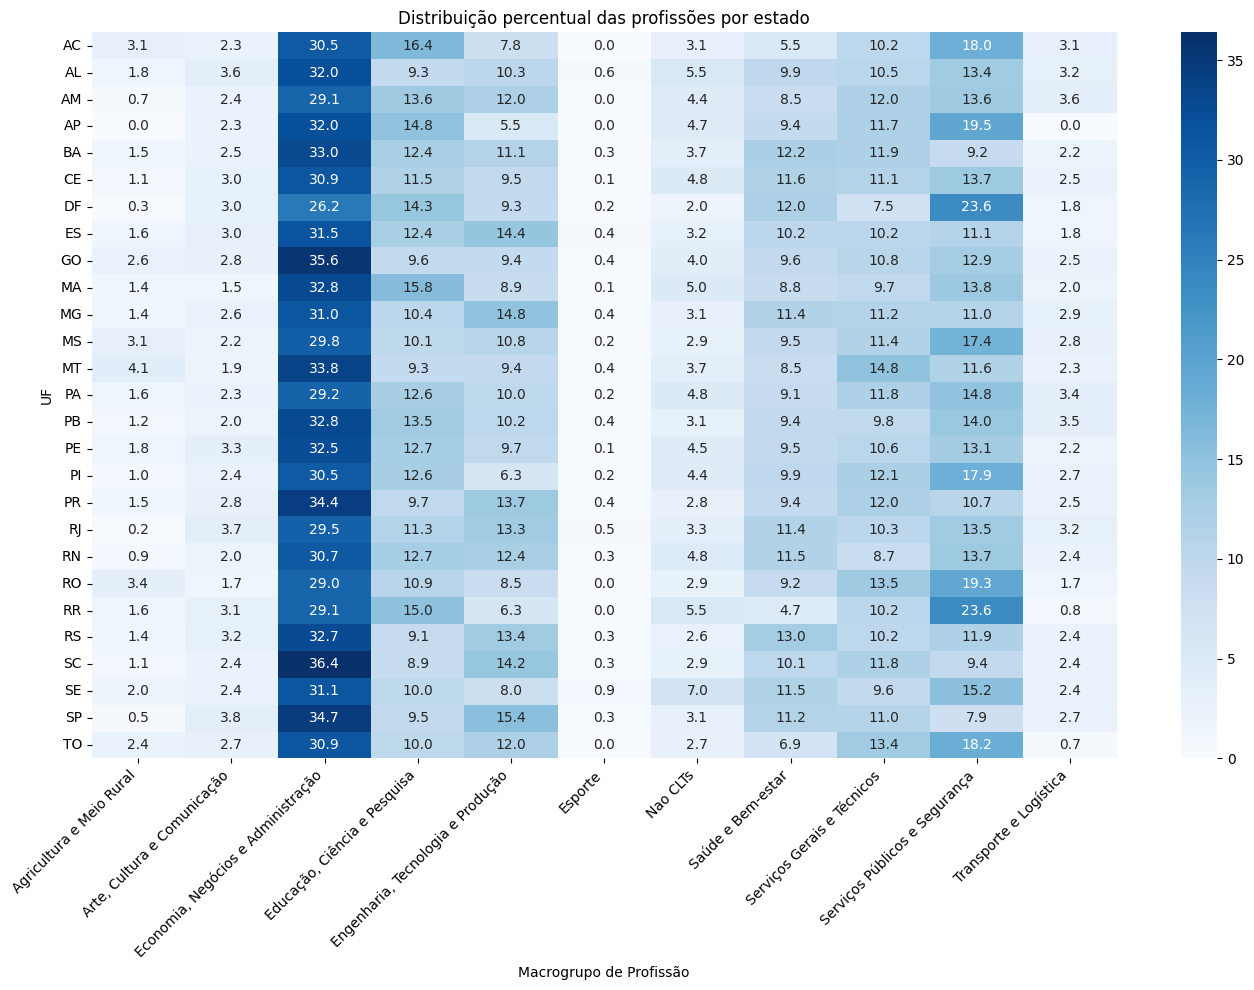

In [31]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Cria a pasta 'images' se n√£o existir
os.makedirs('images', exist_ok=True)

# Plot do gr√°fico
plt.figure(figsize=(14, 10))
sns.heatmap(tabela_percentual, annot=True, fmt=".1f", cmap="Blues")

plt.title('Distribui√ß√£o percentual das profiss√µes por estado')
plt.xlabel('Macrogrupo de Profiss√£o')
plt.ylabel('UF')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0, ha='right')
plt.tight_layout()

# Salvar o gr√°fico na pasta images
plt.savefig('images/distribuicao_profissoes_por_estado.png', dpi=300)

# Exibir o gr√°fico
plt.show()


In [32]:
dados_tesouro.head()

Codigo do Investidor Data de Adesao   Estado Civil Genero  \
781974              41207596     30/06/2023    Solteiro(a)      M   
937737               6333497     04/05/2022  Desquitado(a)      F   
907828               2443618     28/09/2017    Solteiro(a)      F   
784628              40995838     16/01/2023  Desquitado(a)      M   
662460              22100858     19/06/2023    Solteiro(a)      M   

                                    Profissao  Idade UF do Investidor  \
781974                                 OUTROS     28               RS   
937737                                 OUTROS     28               SP   
907828                                 OUTROS     35               BA   
784628                                 OUTROS     55               SP   
662460  AUXILIAR DE ESCRIT√ìRIO E ASSEMELHADOS     24               SP   

       Cidade do Investidor Pais do Investidor Situacao da Conta  \
781974           SANTA ROSA             BRASIL                 A   
937737               OSASCO             BRASIL                 A   
907828             SALVADOR             BRASIL                 D   
784628              JACAREI             BRASIL                 D   
662460      ITAQUAQUECETUBA             BRASIL                 A   

       Operou 12 Meses          Faixa Et√°ria  Grupo_Profissao  \
781974               N  Adulto jovem 18 - 29           Outros   
937737               N  Adulto jovem 18 - 29           Outros   
907828               N        Adulto 30 - 59           Outros   
784628               N        Adulto 30 - 59           Outros   
662460               N  Adulto jovem 18 - 29  Servi√ßos Gerais   

              Macrogrupo_Profissao  
781974                      Outros  
937737                      Outros  
907828                      Outros  
784628                      Outros  
662460  Servi√ßos Gerais e T√©cnicos

## 3. Prepara√ß√£o para cria√ß√£o de base que sera classificada

In [33]:
df_idh = df_idh[['UF', 'IDH-M 2021']]
dados_tesouro_idh = dados_tesouro.merge(df_idh, left_on='UF do Investidor', right_on='UF', how='left')

In [39]:
# dados_finais = dados_tesouro.drop(columns=['Codigo do Investidor', 'Faixa Et√°ria', 'Profissao', 'Grupo_Profissao'])
# dados_finais = dados_tesouro.drop(columns=['Codigo do Investidor', 'Faixa Et√°ria', 'Grupo_Profissao', 'Macrogrupo_Profissao'])
# dados_finais = dados_tesouro.drop(columns=['Codigo do Investidor', 'Grupo_Profissao', 'Macrogrupo_Profissao', 'Idade'])
dados_finais = dados_tesouro_idh.drop(columns=['Codigo do Investidor','UF'])

In [40]:
dados_finais.head()

Data de Adesao   Estado Civil Genero                              Profissao  \
0     30/06/2023    Solteiro(a)      M                                 OUTROS   
1     04/05/2022  Desquitado(a)      F                                 OUTROS   
2     28/09/2017    Solteiro(a)      F                                 OUTROS   
3     16/01/2023  Desquitado(a)      M                                 OUTROS   
4     19/06/2023    Solteiro(a)      M  AUXILIAR DE ESCRIT√ìRIO E ASSEMELHADOS   

   Idade UF do Investidor Cidade do Investidor Pais do Investidor  \
0     28               RS           SANTA ROSA             BRASIL   
1     28               SP               OSASCO             BRASIL   
2     35               BA             SALVADOR             BRASIL   
3     55               SP              JACAREI             BRASIL   
4     24               SP      ITAQUAQUECETUBA             BRASIL   

  Situacao da Conta Operou 12 Meses          Faixa Et√°ria  Grupo_Profissao  \
0                 A               N  Adulto jovem 18 - 29           Outros   
1                 A               N  Adulto jovem 18 - 29           Outros   
2                 D               N        Adulto 30 - 59           Outros   
3                 D               N        Adulto 30 - 59           Outros   
4                 A               N  Adulto jovem 18 - 29  Servi√ßos Gerais   

         Macrogrupo_Profissao  IDH-M 2021  
0                      Outros       0.771  
1                      Outros       0.806  
2                      Outros       0.691  
3                      Outros       0.806  
4  Servi√ßos Gerais e T√©cnicos       0.806

In [41]:
dados_finais.to_parquet("./data/to_classify/sample_data.parquet")